# Preconfiguring the IDE (Предварительная настройка среды разработки)

Установим дополнительные бибилиотеки в среду разработки:

In [ ]:
!pip install ipython-autotime
!pip install nltk
!pip install transformers
!pip install emoji
!pip install ipywidgets
!pip3 install torch torchvision torchaudio

print("Installation completed.")

Installation completed.


Загрузим необходимые бибилеотеки:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as Pipeline_with_sampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
from nltk.corpus import stopwords

import spacy

import emoji
from textblob import TextBlob

import os
import chardet
import string

from IPython.display import display, HTML
print("Setup complete.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ArtyomBoyko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ArtyomBoyko\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ArtyomBoyko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Setup complete.


Настроим вывод времени выполнения для каждой ячейки с помощью `ipython-autotime`:

In [ ]:
%load_ext autotime

time: 0 ns (started: 2022-10-15 10:15:49 +03:00)


Подключим Google Drive:

In [ ]:
# Подключим диск Google Drive
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

time: 375 ms (started: 2022-10-14 17:52:49 +03:00)


Скачаем с Google Drive датасет и распакуем его:

In [ ]:
!unzip /content/drive/MyDrive/MIPT/Data_Scientist/Data_analysis_techniques_and_machine_learning_methods/Part_1/Homework_3/DATASET/Twitter_Sentiment_Analysis.zip -d /content/

time: 47 ms (started: 2022-10-14 17:53:12 +03:00)


"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Определим используемые функции:

In [ ]:
def get_files_charset(directory='./', extensions=('.csv'), chunk_size_bytes=30000):
  
  # result storage
  row_index = []
  row = {"Full file path": [], "File size (MB)": [], "Possible encoding": [], "Possible language": [], "Confidence %": []}

  for root, dirs, files in os.walk(directory):
    for file in files:
      if file.endswith(tuple(extensions)):

        # Получим полный путь к файлу
        full_path = os.path.join(root, file)

        # Получим размер в мегабайтах
        file_size_mb = round(((os.path.getsize(full_path))/(1024*1024)),2)


        with open(full_path, 'rb') as rawdata:
          result = chardet.detect(rawdata.read(chunk_size_bytes))

        row_index.append(file)

        row["Full file path"].append(full_path)
        row["File size (MB)"].append(file_size_mb)
        row["Possible encoding"].append(result['encoding'])
        row["Possible language"].append(result['language'])
        row["Confidence %"].append(result['confidence'] * 100)

    
    result = pd.DataFrame(row, index=row_index)
    result.index.name = 'File name'

    return result

# Функция для проверки категориальных данных датафрейма.
def show_category_values(df, categorical_columns=[]):

  row_index = []
  row = {'Category names' : [], 'Category count':[]}

  if not categorical_columns:
    categorical_columns = df.select_dtypes(include=["category"])
  
  for column in categorical_columns:
    row_index.append(column)
    row["Category names"].append(str(sorted(df[column].unique())))
    row["Category count"].append(df[column].nunique())

  result = pd.DataFrame(row, index=row_index)
  result.index.name = 'Column name'

  return(result)

# Функция для проверки категориальных данных датафрейма.
def show_category_values(df, categorical_columns=[]):

  row_index = []
  row = {'Category names' : [], 'Category count':[]}

  if not categorical_columns:
    categorical_columns = df.select_dtypes(include=["category"])
  
  for column in categorical_columns:
    row_index.append(column)
    row["Category names"].append(str(sorted(df[column].unique())))
    row["Category count"].append(df[column].nunique())

  result = pd.DataFrame(row, index=row_index)
  result.index.name = 'Column name'

  return(result)

  # Функция формирующая отчет по отсутсвующим значениям
def show_missing_values_report(df):

  # Найдём общие показатели 
  
  # Общее число значений в датафрейме
  df_total_cells = np.product(df.shape)

  # Всего, кол-во и процент NaN
  df_total_na = df.isna().sum().sum()
  df_total_is_na_proc = df_total_na * 100 / df_total_cells

  result = pd.DataFrame(columns = ['NaN count', 'NaN %'])
  result.index.name = 'Column name'

  result['NaN count'] = df.isna().sum()

  # Процент от общего числа элементов в датафрейме.
  result['NaN %'] = np.around((result['NaN count'] * 100 / df.shape[0]),4)

  result.loc['TOTAL'] = {'NaN count': result['NaN count'].sum(),
                         'NaN %': np.around(df_total_is_na_proc, decimals=4)}
  
  return result

time: 16 ms (started: 2022-10-15 10:15:57 +03:00)


## Эксперементальные функции:

In [ ]:
def show_words_frequency (df, text_columns=[], top_size=10):
  
  # Получим только текстовые столбцы из анализируемого датафрейма
  if not text_columns:
    numeric_columns = df.select_dtypes(include='object').columns

  for column in text_columns:
    top = pd.Series(' '.join(df[column]).split()).value_counts()[:top_size]
    print("Column name:", column)
    print(top, "\n")

  return None

def remove_stop_words(df, text_columns=[], stop_words = []):
  
  # сделаем копию данных и будем работать именно с ней.
  result = df.copy()

  # Получим только текстовые столбцы из анализируемого датафрейма
  if not text_columns:
    text_columns = result.select_dtypes(include='object').columns
  
  for column in text_columns:
    for stop_word in stop_words:
      # Будем добалять к каждому стоп-слову пробелы в качестве ведущего и 
      # завершающего символа. Удаляем стоп-слова путём их замены на одиночный символ пробела.
      result[column] = result[column].str.replace(stop_word, "", n=-1)

  return result

# Функция удаляющая слова из списка из нескольких столбцов
def remove_words(df, text_columns=[], words = []):
  # сделаем копию данных и будем работать именно с ней.
  result = df.copy()

  # Получим только текстовые столбцы из анализируемого датафрейма
  if not text_columns:
    text_columns = result.select_dtypes(include='object').columns
  
  for column in text_columns:
    for word in words:
      # Будем добалять к каждому стоп-слову пробелы в качестве ведущего и 
      # завершающего символа. Удаляем стоп-слова путём их замены на одиносный символ пробела.
      result[column] = result[column].str.replace(word, "", n=-1)

  return result

# Функция производящая замену слов с использованиием словаря
def replace_words_with_dict(df, text_columns=[], repl_dict={}):
  
  # Словарь не может быть пустым
  if not repl_dict:
    return None

  # сделаем копию данных и будем работать именно с ней.
  result = df.copy()

  # Получим только текстовые столбцы из анализируемого датафрейма
  if not text_columns:
    text_columns = df.select_dtypes(include='object').columns

  for column in text_columns:
    for key, values in repl_dict.items():
      result[column] = result[column].str.replace(key, values, regex=True)
 
  return result


time: 0 ns (started: 2022-10-15 10:15:58 +03:00)


# Problem Definition (Описание проблемы)

## Задание

Необходимо реализовать предсказание настроений с помощью классических алгоритмов + tf-idf на основе данных твиттов и наивным байесом. 

На "отлично" - попробовать обучить любой из пройденных алгоритмов на основе эмбеддингов взвешенных по attention или с помощью классических от TruncatedSVD на основе полиномиальных от tf-idf с (1-3) биграммами.

Поскольку глубокие сети еще впереди код конвертации списка предложений в эмбеддинг по ссылке выше.

Т.к. мы чаще всего работаем с нампай массивами в обучении, используйте:
`sentence_embeddings.detach().numpy()`

## About Dataset (О датасете)

Цель этой задачи - обнаружить разжигание ненависти в твитах. Для простоты мы говорим, что твит содержит призыв к ненависти, если с ним связаны расистские или сексистские настроения. Таким образом, задача заключается в классификации расистских или сексистских твитов от других твитов.

Формально, учитывая обучающую выборку твитов и метки, где метка `1` означает, что твит расистский/сексистский, а метка `0` означает, что твит не расистский/сексистский, ваша цель - предсказать метки на тестовом наборе данных.

Содержание
Для тренировочных данных предоставляются полные тексты твитов с их метками.
Имя пользователей заменены на `@user`.

# Data Extraction (Извлечение данных)

Определим кодировку и язык используемый в файлах датасета:

In [ ]:
directory = '/content'
extensions = ['.csv']

get_files_charset(directory, extensions)

,Full file path,File size (MB),Possible encoding,Possible language,Confidence %
File name,,,,,
train.csv,/content/train.csv,2.96,utf-8,,99.0
test.csv,/content/test.csv,1.56,utf-8,,99.0


time: 306 ms (started: 2022-10-13 15:39:04 +00:00)


Посмотрим на первые строки файлов:

In [ ]:
!head -5 /content/train.csv

id,label,tweet
1,0, @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
3,0,  bihday your majesty
4,0,#model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦  
time: 140 ms (started: 2022-10-13 15:39:30 +00:00)


In [ ]:
!head -5 /content/test.csv

id,tweet
31963,#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterialsâ¦ 
31964, @user #white #supremacists want everyone to see the new â  #birdsâ #movie â and hereâs why  
31965,safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!! 
31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð   #harrypotter #pottermore #favorite"
time: 130 ms (started: 2022-10-13 15:39:31 +00:00)


Датасет состоит из двух файлов - `train.csv` и `test.csv`. В обоих файлах с точностью 99% используется кодировка UTF8, разделителем столбцов является символ `,`. Файлы содержат разное количество столбцов, поэтому загружать их нужно в разные датафреймы.

Оба файла содержат индекс в столбце `id`, который не является параметром данных. 

Определим словари с типами данных для каждого столбца файлов. Если какой-либо из столбцов не будет указан в данном словаре, то его тип Pandas выберет самостоятельно. Для того, чтобы Pandas более корректно подбирал типы данных (основываясь не всем файле, а не на его части) на этапе загрузки данных укажем параметр `low_memory=False`. Файлы так же содержат индекс в столбце `id`, учтём это с помощью параметра `index_col='id'`. 

In [ ]:
test_dtypes = {'id':  'int32'}

train_dtypes = {'id':  'int16',
                'label':  'int8'}

time: 1.05 ms (started: 2022-10-13 15:39:33 +00:00)


Загрузим данные датасета в датафреймы Pandas: 

In [ ]:
test_df = pd.read_csv('test.csv', sep=",", dtype=test_dtypes, index_col='id', low_memory=False)

train_df = pd.read_csv('train.csv', sep=",", dtype=train_dtypes, index_col='id', low_memory=False)

time: 118 ms (started: 2022-10-13 15:39:33 +00:00)


Посмотрим на используемые в датафреймах типы данных столбцов:

In [ ]:
train_df.dtypes

label      int8
tweet    object
dtype: object

time: 8.27 ms (started: 2022-10-13 15:39:34 +00:00)


In [ ]:
test_df.dtypes

tweet    object
dtype: object

time: 6.18 ms (started: 2022-10-13 15:39:36 +00:00)


Проверим описательные статистики для числовых столбцов каждого датафрейма:

In [ ]:
train_df.describe()

,label
count,31962.000000
mean,0.070146
std,0.255397
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


time: 21.3 ms (started: 2022-10-13 15:39:36 +00:00)


In [ ]:
test_df.describe()

,tweet
count,17197
unique,16130
top,#model i love u take with u all the time in ...
freq,170


time: 23.4 ms (started: 2022-10-13 15:39:37 +00:00)


Проверим содержимое датафреймов по первым 10 экземплярам (точкам) данных:

In [ ]:
train_df.head(10)

,label,tweet
id,,
1,0,@user when a father is dysfunctional and is s...
2,0,@user @user thanks for #lyft credit i can't us...
3,0,bihday your majesty
4,0,#model i love u take with u all the time in ...
5,0,factsguide: society now #motivation
6,0,[2/2] huge fan fare and big talking before the...
7,0,@user camping tomorrow @user @user @user @use...
8,0,the next school year is the year for exams.ð...
9,0,we won!!! love the land!!! #allin #cavs #champ...


time: 8.46 ms (started: 2022-10-13 15:39:38 +00:00)


In [ ]:
test_df.head(10)

,tweet
id,
31963,#studiolife #aislife #requires #passion #dedic...
31964,@user #white #supremacists want everyone to s...
31965,safe ways to heal your #acne!! #altwaystohe...
31966,is the hp and the cursed child book up for res...
31967,"3rd #bihday to my amazing, hilarious #nephew..."
31968,choose to be :) #momtips
31969,something inside me dies ð¦ð¿â¨ eyes nes...
31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
31971,@user @user @user i will never understand why...


time: 7.59 ms (started: 2022-10-13 15:39:39 +00:00)


Данные загруженны успешно.

# Data cleaning (Отчистка данных)

Наши данные представляют собой текст, содержащийся в столбце `tweet` обоих датафреймов и метки классификации для тренировочных данных, содержащиеся в столбце `label`.

Поменяем столбцы в тренировочных данных местами, для удобства восприятия информации:

In [ ]:
new_cloumns_order = ['tweet','label']

train_df = train_df[new_cloumns_order]

train_df.head()

,tweet,label
id,,
1,@user when a father is dysfunctional and is s...,0
2,@user @user thanks for #lyft credit i can't us...,0
3,bihday your majesty,0
4,#model i love u take with u all the time in ...,0
5,factsguide: society now #motivation,0


time: 10.7 ms (started: 2022-10-13 15:39:41 +00:00)


## Handling Missing Values (Обработка отсуствующих значений)

Проверим датафреймы на предмет отсутсвующих точек данных. Чтобы в дальнейшем не возникало проблем с функциями и методами чувствительными к отсутствующим значениям.

In [ ]:
show_missing_values_report(train_df)

,NaN count,NaN %
Column name,,
tweet,0,0.0
label,0,0.0
TOTAL,0,0.0


time: 25.4 ms (started: 2022-10-13 15:39:42 +00:00)


In [ ]:
show_missing_values_report(test_df)

,NaN count,NaN %
Column name,,
tweet,0,0.0
TOTAL,0,0.0


time: 18.3 ms (started: 2022-10-13 15:39:44 +00:00)


Отсутствующих данных нет.

## Data deduplication (дедубликация данных)

Проверим, сколько дублей в датасете:

In [ ]:
print(train_df.duplicated().sum())

2432
time: 24.8 ms (started: 2022-10-13 15:39:44 +00:00)


Уберем дубли:

In [ ]:
train_df.drop_duplicates()

,tweet,label
id,,
1,@user when a father is dysfunctional and is s...,0
2,@user @user thanks for #lyft credit i can't us...,0
3,bihday your majesty,0
4,#model i love u take with u all the time in ...,0
5,factsguide: society now #motivation,0
...,...,...
31957,off fishing tomorrow @user carnt wait first ti...,0
31958,ate @user isz that youuu?ðððððð...,0
31959,to see nina turner on the airwaves trying to...,0


time: 35.4 ms (started: 2022-10-13 15:39:46 +00:00)


## Exploring the data structure (Изучение структуры данных датасета)

Датасет состоит из двух частей:
1. Тренировочные данные (файл `train.csv`, далее датафрейм `traind_df`), содержат один текстовый параметр (`tweet`) и цель предсказания - `label`. В цели предсказания всего две категории: `0` - твит не расистский/сексистский и `1` - твит расистский/сексистский.
2. Тестовые данные (файл `test.csv`, далее датафрейм `test_df`). В тренировочных данных всего один текстовый параметр (`tweet`) содержащий твиты.

## Categorical data (Категориальные данные)

Параметр `label` тренировочных данных содержит цель предсказания - категорию твита. Приведем его к соответствующему типу данных предварительно проведя проверку столбца на премет несогласованного ввода. 

### Check for inconsistent input (Проверка на несогласованный ввод данных)

In [ ]:
categorical_columns = ['label']

show_category_values(train_df, categorical_columns)

,Category names,Category count
Column name,,
label,"[0, 1]",2


time: 10.7 ms (started: 2022-10-13 15:39:48 +00:00)


Судя по выводу выше:
- катогории две,
- значения категорий заданны числами. 

Проблем с несогласованным вводом нет.

### Casting to the correct data type (Приведение к корректному типу данных)

Приведем столбец `label` к категориальному типу данных:

In [ ]:
train_df[categorical_columns] = train_df[categorical_columns].astype('category')

train_df.dtypes

tweet      object
label    category
dtype: object

time: 11.9 ms (started: 2022-10-13 15:39:49 +00:00)


## Text data (strings) (Текстовые данные (строки))

Взглянем еще раз на содержание столбца `tweet`:

In [ ]:
train_df.head(10)

,tweet,label
id,,
1,@user when a father is dysfunctional and is s...,0
2,@user @user thanks for #lyft credit i can't us...,0
3,bihday your majesty,0
4,#model i love u take with u all the time in ...,0
5,factsguide: society now #motivation,0
6,[2/2] huge fan fare and big talking before the...,0
7,@user camping tomorrow @user @user @user @use...,0
8,the next school year is the year for exams.ð...,0
9,we won!!! love the land!!! #allin #cavs #champ...,0


time: 10.4 ms (started: 2022-10-13 15:39:50 +00:00)


Более подробно посмотрим на параметр `tweet` для 2, 5 и 9 точек данных: 

In [ ]:
train_df['tweet'][2]

"@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

time: 7.44 ms (started: 2022-10-13 15:39:51 +00:00)


In [ ]:
train_df['tweet'][5]

' factsguide: society now    #motivation'

time: 4.31 ms (started: 2022-10-13 15:39:52 +00:00)


In [ ]:
train_df['tweet'][9]

'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  â\x80¦ '

time: 4.12 ms (started: 2022-10-13 15:39:53 +00:00)


В твитах очень много ненужных слов, которые могут стать причиной появления высокочастотного шума в наших данных. Нам точно бесполезны:
1. Заменитель реальных имён пользователей `@user`. Который использовался при анонимизации данных.
2. Различного рода предлоги, союзы и т. д. Вторая группа высокочастотных слов создающих шум в данных называется стоп-словами.

Стоит так же заметить, что текстовые данные в большинстве случаев бесполезно проверять на предмет несогласованного ввода. Поэтому я сразу перейду к отчистке текстовых данных. Конечно можно произвести проверку орфографии, но она занимает много времени. Кроме того перед проверкой орфографии необходимо отчистить датасет от "лишних" символов.

### Creating a copy of the original data (Создание копии исходных данных)

Создадим копию исходных данных с целью предотвращения их непреднамеренного повреждения. Далее мы будем работать с копией данных.

In [ ]:
train_df_cleanup = train_df.copy()

train_df_cleanup.head()

,tweet,label
id,,
1,@user when a father is dysfunctional and is s...,0
2,@user @user thanks for #lyft credit i can't us...,0
3,bihday your majesty,0
4,#model i love u take with u all the time in ...,0
5,factsguide: society now #motivation,0


time: 12.1 ms (started: 2022-10-13 15:39:54 +00:00)


In [ ]:
test_df_cleanup = test_df.copy()

test_df_cleanup.head()

,tweet
id,
31963,#studiolife #aislife #requires #passion #dedic...
31964,@user #white #supremacists want everyone to s...
31965,safe ways to heal your #acne!! #altwaystohe...
31966,is the hp and the cursed child book up for res...
31967,"3rd #bihday to my amazing, hilarious #nephew..."


time: 9.43 ms (started: 2022-10-13 15:39:56 +00:00)


### Preparing text data (Подготовка текстовых данных)

В целях упрощения дальнейшей обработки текстовых данных и снижения ее вычислительной емкости произведем следующие преобразования со всем текстом датасета:
1. Приведем весь текст к нижнему регистру.
2. Удалите ведущие и завершающие символы  (включая символы новой строки, пробелы).

 и внесем изменения в копии:

In [ ]:
train_df_cleanup['tweet'] = train_df_cleanup['tweet'].str.lower()
train_df_cleanup['tweet']= train_df_cleanup['tweet'].str.strip()

test_df_cleanup['tweet'] = test_df_cleanup['tweet'].str.lower()
test_df_cleanup['tweet'] = test_df_cleanup['tweet'].str.strip()

time: 71.5 ms (started: 2022-10-13 15:39:58 +00:00)


Посмотрим на первые 15 часто встречающихся слов:

In [ ]:
show_words_frequency(train_df_cleanup, text_columns=['tweet'], top_size=15)

Column name: tweet
@user    17291
the      10065
to        9768
a         6261
i         5655
you       4949
and       4831
in        4570
for       4435
of        4152
is        4102
my        3626
on        2554
with      2482
this      2462
dtype: int64 

time: 275 ms (started: 2022-10-13 15:39:59 +00:00)


In [ ]:
show_words_frequency(test_df_cleanup, text_columns=['tweet'], top_size=15)

Column name: tweet
@user    9409
the      5424
to       5186
a        3281
i        3129
and      2662
you      2607
for      2473
in       2346
of       2241
is       2235
my       1916
on       1371
with     1316
this     1313
dtype: int64 

time: 127 ms (started: 2022-10-13 15:40:04 +00:00)


Необходимо убрать из датасета слова-заполнители (например слово `@user`) и стоп-слова.

### Remove special words (Удалие специальных слов)

В нашем датасете всего одно специальное слово, которое использовалось как замена имени пользователя при анонимизации данных. Это слово `@user`. Удалим его:

In [ ]:
special_words = ['@user']

train_df_cleanup = remove_words(train_df_cleanup, ['tweet'], special_words)
test_df_cleanup = remove_words(test_df_cleanup, ['tweet'], special_words)

time: 66.8 ms (started: 2022-10-13 15:40:04 +00:00)


Проверим результат:

In [ ]:
train_df_cleanup.head()

,tweet,label
id,,
1,when a father is dysfunctional and is so self...,0
2,thanks for #lyft credit i can't use cause th...,0
3,bihday your majesty,0
4,#model i love u take with u all the time in ...,0
5,factsguide: society now #motivation,0


time: 14.3 ms (started: 2022-10-13 15:40:05 +00:00)


In [ ]:
test_df_cleanup.head()

,tweet
id,
31963,#studiolife #aislife #requires #passion #dedic...
31964,#white #supremacists want everyone to see the...
31965,safe ways to heal your #acne!! #altwaystohe...
31966,is the hp and the cursed child book up for res...
31967,"3rd #bihday to my amazing, hilarious #nephew e..."


time: 18.2 ms (started: 2022-10-13 15:40:06 +00:00)


Отлично! В нашем наборе данных стало больше полезной информации (за счёт уменьшения количества бесполезной). Но на данном этапе нельзя удалять стоп-слова. Потому что они могу снова появиться из за преобразования в тестовый вариант эмоджи, смайликов и лемматизации!

### Replacing special abbreviations used in chats (Замена специальных сокращений используемых в чатах)

МОЖНО ОСТАВЛЯЕМ КАК ЕСТЬ. ЭТИ СЛОВА ВСЕ РАВНО БУДЕТ УЧИТЫВАТЬСЯ ПРИ КЛАССИФИКАЦИИ НО ,В СОКРАЩЕННОМ ВАРИАНТЕ.

В чатах очень часто используются сокращения для различных слов и их сочетаний.
Например, "lol" - "	laugh out loud". Проверим, есть ли такие сокращения в нашем датасете:

In [ ]:
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r' lol ')].head(10)

,tweet,label
id,,
679,taeyeon unnie is on fire! ð btw i really ho...,0
1059,no mojo man lol week one over from this new p...,0
1072,keeping the shape lol running time! #running #...,0
1244,now i'm fully blocked?? lol dam i didn't know...,0
2949,3 days until i'm kelowna bound to scout out ou...,0
3154,2 weeks till my mini vaccay.. not like i'm cou...,0
3225,i post waaaay to many pictures with my boyfrie...,0
4525,he'd rather kiss ð© than me! no boys will ev...,0
4806,#yes lol omg,0


time: 43.2 ms (started: 2022-10-13 15:40:08 +00:00)


In [ ]:
test_df_cleanup[test_df_cleanup['tweet'].str.contains(r' lol ')].head(10)

,tweet
id,
32903,"when you have nothing else to do, get the #sel..."
33370,1 hour secret meeting lol happy finally see yo...
34221,#humpday...here's a #post #show accidental #se...
34310,"laugh, laugh, laugh and laughhh laugh is the o..."
34314,went all 80's yesterday lol #hair #highponytai...
34550,#caramel #frappuccino just makes me so lol...
35569,now to wait till next pay to get my boxes for ...
35893,ok im #lonely on this twitter can i get some f...
36059,"when life throws lemons at your head, go get c..."


time: 31 ms (started: 2022-10-13 15:40:09 +00:00)


Такие сокращения есть. Составим список наиболее часто используемых сокращений и произведем замену:

In [ ]:
chat_words = {" ?4u " : " i have a question for you ",
              " ^^ " :	" read line above ",
              " 121 " : 	" one-to-one ",
              " <3 " :	" love ",
              " 2 " :	" to ",
              " 2mrw " : " tomorrow ",
              " 4 " : " for ",
              " afk" : " away from keyboard ",
              " aka " : " also known as ",
              " asap " : " as soon as possible ",
              " a/s/l " : " age / sex / location ",
              " ayt " :	" are you there? ",
              " b2w " : " back to work ",
              " b4 " : " before ",
              " bbl " : " be back later ",
              " bbs " : " be back soon ",
              " bf ": " boyfriend ",
              " bff " : " best friend(s) forever ",
              " brb " :	" be right back ",
              " btw " : " by the way ",
              " cmb " : " Call me back ",
              " cmiiw " : " correct me if i'm wrong ",
              " cu " : " see you ",
              " cu l8r " : " see you later ",
              " cuz/cos " :	" because ",
              " cwyl " :	" chat with you later ",
              " dc " : " disconnected ",
              " diy " :	" do it yourself ",
              " dm " : " direct Message ",
              " f2f " : " face-to-face ",
              " faq " : " frequently asked questions ",
              " fb " : " facebook ",
              " fyi " : " for your information ",
              " fyeo " : " for your eyes only ",
              " gb " : " goodbye ",
              " gf " : " girlfriend ",
              " gg " : " gotta go ",
              " gl " : " good luck ",
              " gr " : " gotta run ",
              " gr8 " : " great! ",
              " hbd " : " happy birthday ",
              " hhhhhh " : " very funny ",
              " how r u " :	" how are you? ",
              " ic " : " i see ",
              " idk " : " i don't know ",
              " imho " : " in my humble opinion ",
              " ik " : " i know ",
              " im " : " instant Message ",
              " iow " : " in other words ",
              " j/k " : " just kidding ",
              " k " : " ok ",
              " l8r " : " later ",
              " lol " : " laugh out loud ",
              "lol " : " laugh out loud ",
              " m/f " : " male or female? ",
              " mins " : " minutes ",
              " msg " : " message ",
              " nv " : " nevermind ",
              " oic " : " oh, i see ",
              " otw " : " on the way ",
              " p2p " : " person-to-person ",
              " plz " : " please ",
              " pm " : " private message ",
              " rofl " : " rolling on the floor laughing ",
              " ruok " : " are you okay? ",
              " sup " : " what's up? ",
              " zup " : " what's up? ",
              " syl " : " see you later ",
              " tgif " : " thank goodness it's friday ",
              " thx " : " thanks ",
              " thnx " : " thanks ",
              " ttfn " : " ta ta for now ",
              " ttyl " : " talk to you later ",
              " tyt " : " take your time ",
              " u " : " you ",
              " u2 " : " you too ",
              " ur " : " your ",
              " w/ " : " with ",
              " w/o " : " without ",
              " wru " : " where are you? ",
              " xo " : " hugs and kisses ",
              " zzz " : " tired ",
              " wtf " : "what the fuck? "}

train_df_cleanup['tweet'] = train_df_cleanup['tweet'].replace(chat_words, regex=True)
test_df_cleanup['tweet'] = test_df_cleanup['tweet'].replace(chat_words, regex=True)

time: 6.75 s (started: 2022-10-13 15:40:11 +00:00)


Проверим результат произведенных замен:

In [ ]:
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r' lol ')]

,tweet,label
id,,


time: 43.4 ms (started: 2022-10-13 15:40:17 +00:00)


In [ ]:
test_df_cleanup[test_df_cleanup['tweet'].str.contains(r' lol ')]

,tweet
id,


time: 32.1 ms (started: 2022-10-13 15:40:17 +00:00)


### Replacing emoticons with text (Замена эмотиконов на соответствующий текст)

В сообщениях твиттера возможно использование [эмотиконов](https://ru.wikipedia.org/wiki/%D0%AD%D0%BC%D0%BE%D1%82%D0%B8%D0%BA%D0%BE%D0%BD). Проверим это:

In [ ]:
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r'\:\)\)')].head(10)

,tweet,label
id,,
542,yep - grateful for everyday :)))) #gratitude ...,0
2462,it's so soothing to see you on tv after a bad...,0
3356,yep - grateful for everyday :)))) #gratitude ...,0
3459,6-4 placement games :))) now it's time for the...,0
3802,alhamdullilah i got an b+ in innovation exam! ...,0
8561,i love edm so much :))) can't wait to get log...,0
10328,love walking out of work making less than my ...,0
12768,always in #peace â #calm #lover #softspoke...,0
13015,first day of my summer nursing placements tomo...,0


time: 39.3 ms (started: 2022-10-13 15:40:17 +00:00)


In [ ]:
test_df_cleanup[test_df_cleanup['tweet'].str.contains(r'\:\)\)')].head(10)

,tweet
id,
36795,details ... #painting #a #figurative #color #a...
36922,sam adams #a #garden #studio i #feel every...
37344,looking beautiful mntaka mamam :)))
38483,bit whines when #black person is being called ...
39532,group slide with the sibs pa to :)) #unbiosi...
40488,waiting to check out!! :))) #kyliecosmetics...
41584,group slide with the sibs pa 3 :)) #unbiosib...


time: 25.5 ms (started: 2022-10-13 15:40:18 +00:00)


Как и ожидалось, эмотиконы присутсвуют в тесте твитов. Преобразуем наиболее часто используемые эмотиконы в соответссующие им эмоции:

In [ ]:
emoticons = {"\:\)\)" : "very happy",
             "\:\)" : "happy",
             "\:\-\)" : "happy", 
             "\:\(\(" : "very sad", 
             "\:\(" : "sad", 
             "\:\-\(" : "sad", 
             "\:\-d" : "laughing", 
             "\:\'\(": "crying", 
             "\:\'\)" : "tears of happiness"
             }

train_df_cleanup['tweet'] = train_df_cleanup['tweet'].replace(emoticons, regex=True)
test_df_cleanup['tweet'] = test_df_cleanup['tweet'].replace(emoticons, regex=True)

time: 662 ms (started: 2022-10-13 15:40:20 +00:00)


Проверим результат:

In [ ]:
train_df_cleanup.tweet[3356]

'yep - grateful for everyday very happy)) #gratitude  #laurasworld'

time: 5.28 ms (started: 2022-10-13 15:40:22 +00:00)


In [ ]:
train_df.head(10)

,tweet,label
id,,
1,@user when a father is dysfunctional and is s...,0
2,@user @user thanks for #lyft credit i can't us...,0
3,bihday your majesty,0
4,#model i love u take with u all the time in ...,0
5,factsguide: society now #motivation,0
6,[2/2] huge fan fare and big talking before the...,0
7,@user camping tomorrow @user @user @user @use...,0
8,the next school year is the year for exams.ð...,0
9,we won!!! love the land!!! #allin #cavs #champ...,0


time: 14.4 ms (started: 2022-10-13 15:40:22 +00:00)


In [ ]:
test_df_cleanup.tweet[39532]

'group slide with the sibs pa to very happy   #unbiosibs #slideâ\x80¦'

time: 7.43 ms (started: 2022-10-13 15:40:24 +00:00)


Выбранные эмотики преобразованны в слова, все остальные будут удалены на этапе отчистки датасета от пунктуации.

### Convert emoji (Преобразуем эмоджи)

Проверим твиты на наличие эмоджи:

In [ ]:
def has_emoji(text):
    for character in text:
        if (emoji.is_emoji(character)):
            return True
    return False

for index, text in train_df_cleanup.tweet.items():
  if has_emoji(text):
    print(index, text)
  else:
    continue

69 ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
99 #hump on that    #hump day #humpersð© @ edwardsville, pennsylvania
125 friday i miss you!!   #fringes#qcbags#summer ððððððó¾®ð»
228 my friend just got engaged  ð©ââ¤ï¸âðâð©
275 #æ´å®å0616çæ¥å¿«ä¹  bihday to my bogummy!!!love you forever!hope you happy everyday!good night!ð
287 maybe for happy hour you can get a "  #ending" ó¾®ó¾µó¾­»
373 my monday is so empty without the bachelorette ð©ð¹ð· #thebachelorette   #empty #nowine
429 cleaning ze house and zoing ziy laundry. ã i'm finally free from fever and colds. â©__â©i'm happy! #cleaning #laundryday
434  * sweets ð°ð©ð¬ð­ð«â¨!!!!!! * #instagood #ìì´ë #å¶å #idola #idol #à¹à¸­à¸à¸­à¸¥ #followme #selfie   #ã©ãããâ¦
482 when quay collab with  says sold out!!!ð©ð«ð©ð«ð©ð«ð©ð«ð©ð«ð©ð«ð©   #noooo #whyyyy #loveyoudesi #


Из вывода выше видно, что эмоджи есть.

Преобразуем эмоджи в соответсвующие им слова:

In [ ]:
def convert_emoji(row):
    row['tweet'] = emoji.demojize(row['tweet'])
    return row

train_df_cleanup = train_df_cleanup.apply(convert_emoji, axis='columns')
test_df_cleanup = test_df_cleanup.apply(convert_emoji, axis='columns')

time: 5.85 s (started: 2022-10-13 15:40:28 +00:00)


Проверим преобразование:

In [ ]:
train_df_cleanup.tweet[1778]

'ð\x9f\x8e:registered:  ninomiya kazunari  happy bihday ! ð\x9f\x8e\x89  love forever ... â\x9d¤ï¸\x8e  #ninomiyakazunari  â\x80¦'

time: 4.74 ms (started: 2022-10-13 15:40:33 +00:00)


Эмоджи преобразованны. Это можно замметить по подстроке `:registered:`.

### Removing HTML (Удаление HTML)

#### Removing HTML Tags (Удаление HTML-тегов)

Проверим, есть ли в твитах теги HTML:

In [ ]:
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r'<.*?>')]

,tweet,label
id,,


time: 38.7 ms (started: 2022-10-13 15:40:33 +00:00)


In [ ]:
test_df_cleanup[test_df_cleanup['tweet'].str.contains(r'<.*?>')]

,tweet
id,


time: 37.6 ms (started: 2022-10-13 15:40:34 +00:00)


HTML-тегов в твитах нет, но если бы они были, то их пришлось бы удалить.

Удалим HTML-теги:

In [ ]:
def get_HTML_tags(df, text_column):
  result = df[text_column].str.findall(r'<.*?>').to_list()
  result = set([item for sublist in result for item in sublist])
  
  return list(result)

HTML_tags_traint = get_HTML_tags(train_df_cleanup, 'tweet')
HTML_tags_test = get_HTML_tags(test_df_cleanup, 'tweet')


train_df_cleanup = remove_words(train_df_cleanup, ['tweet'], HTML_tags_traint)
test_df_cleanup = remove_words(test_df_cleanup, ['tweet'], HTML_tags_test)

time: 244 ms (started: 2022-10-13 15:40:34 +00:00)


Проверим результат:

In [ ]:
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r'<.*?>')]

,tweet,label
id,,


time: 36.6 ms (started: 2022-10-13 15:40:34 +00:00)


In [ ]:
test_df_cleanup[test_df_cleanup['tweet'].str.contains(r'<.*?>')]

,tweet
id,


time: 28.2 ms (started: 2022-10-13 15:40:35 +00:00)


#### Remove HTML character reference (Удаление специальных слов HTML)

В тексте каждого твита могут содержаться специальные символ HTML (например: `&amp` или `&gt`). Как правило, это символы которых нет на клавиатуре, но они нужны для правильного отображения информации. Особенность этих символов заключается в том, что все они начинаются с символа `&`. Проверим твиты: Найдём специальные символы используемые в нашем датасете:

In [ ]:
# Найдём все экземпляры данных которые содержат специальные символы HTML
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r'https?://\S+|www\.\S+')]

,tweet,label
id,,
1112,#fly #and #better #with #us #buranus #www.f...,0
6376,#isitthursdayyet? it's not? awwww... #critical...,0
8085,couple having sex www.drunk singapore girl get...,0
8485,so glad my #workout includes smoke breaks...ww...,0
8661,just run 10kms for #loveisall pour donne...,0
25746,sirrr getting new one wowwww... to see this...,0


time: 54.1 ms (started: 2022-10-13 15:40:35 +00:00)


In [ ]:
test_df_cleanup[test_df_cleanup['tweet'].str.contains(r"\&w*\b")]

,tweet
id,
31980,&amp; #love &amp; #hugs &amp; #kisses too! how...
31982,thought factory: bbc neutrality on right wing ...
31992,tried that! but nothing - will try again! kn...
32000,"snow white --&gt; open! --&gt; #sleepy, , #s..."
32006,my granddaughter's 1st bihday is tomorrow. go...
...,...
49090,#thursdaythoughtsð­ð¤i made this change a ...
49116,- tyler ward &amp; cimorelli cover - pharrell ...
49126,i'd be ashamed of my state if i took any res...


time: 28.5 ms (started: 2022-10-13 15:40:38 +00:00)


В наших данных они есть, составим список этих символов и удалим их:

In [ ]:
def get_html_special_symbols(df, text_column):
  result = df[text_column].str.findall(r'\&\w*\b').to_list()
  result = set([item for sublist in result for item in sublist])
  
  return list(result)

html_special_symbols_train = get_html_special_symbols(train_df_cleanup, 'tweet')

html_special_symbols_test = get_html_special_symbols(test_df_cleanup, 'tweet')

time: 39.2 ms (started: 2022-10-13 15:40:39 +00:00)


In [ ]:
html_special_symbols_train

['&lt', '&amp', '&gt']

time: 3.63 ms (started: 2022-10-13 15:40:39 +00:00)


In [ ]:
html_special_symbols_test

['&lt', '&amp', '&gt']

time: 4.06 ms (started: 2022-10-13 15:40:40 +00:00)


Удалим их:

In [ ]:
train_df_cleanup = remove_words(train_df_cleanup, ['tweet'], html_special_symbols_train)
test_df_cleanup = remove_words(test_df_cleanup, ['tweet'], html_special_symbols_test)

time: 144 ms (started: 2022-10-13 15:40:42 +00:00)


Проверим результат:

In [ ]:
train_df_cleanup.tweet[149]

' ;3 listen to my most beautiful best friend    singing with her most amazing voice ;3 ;3 ;3 ;3 17'

time: 5.44 ms (started: 2022-10-13 15:40:43 +00:00)


In [ ]:
test_df_cleanup.tweet[31980]

'; #love ; #hugs ; #kisses too! how to keep your #baby     #parenting #healthcare'

time: 4.99 ms (started: 2022-10-13 15:40:44 +00:00)


Специальных символов больше не встречается.

#### Removing URL (Удалим URL)

Проверим, есть ли твитах URL:

In [ ]:
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r"https?://\S+|www\.\S+")]

,tweet,label
id,,
1112,#fly #and #better #with #us #buranus #www.f...,0
6376,#isitthursdayyet? it's not? awwww... #critical...,0
8085,couple having sex www.drunk singapore girl get...,0
8485,so glad my #workout includes smoke breaks...ww...,0
8661,just run 10kms for #loveisall pour donne...,0
25746,sirrr getting new one wowwww... to see this...,0


time: 61.4 ms (started: 2022-10-13 15:40:45 +00:00)


In [ ]:
train_df_cleanup[train_df_cleanup['tweet'].str.contains(r'https?://\S+|www\.\S+')]

,tweet,label
id,,
1112,#fly #and #better #with #us #buranus #www.f...,0
6376,#isitthursdayyet? it's not? awwww... #critical...,0
8085,couple having sex www.drunk singapore girl get...,0
8485,so glad my #workout includes smoke breaks...ww...,0
8661,just run 10kms for #loveisall pour donne...,0
25746,sirrr getting new one wowwww... to see this...,0


time: 54.8 ms (started: 2022-10-13 15:40:46 +00:00)


In [ ]:
test_df_cleanup[test_df_cleanup['tweet'].str.contains(r'https?://\S+|www\.\S+')]

,tweet
id,
38670,#www.ukpranichealing.co.uk# healthy #
40630,join essence of #life. www.face #care #inspir...
43052,awww... just. awww...
45367,awww....how ð¢
46817,join essence of #life. www.face #care #inspir...
46968,just run 10kms for #loveisall pour donner...


time: 39.8 ms (started: 2022-10-13 15:40:46 +00:00)


URL есть, удалим их:

In [ ]:
def get_URLs(df, text_column):
  result = df[text_column].str.findall(r'https?://\S+|www\.\S+').to_list()
  result = set([item for sublist in result for item in sublist])
  
  return list(result)

URLs_train = get_URLs(train_df_cleanup, 'tweet')
URLs_test = get_URLs(test_df_cleanup, 'tweet')


train_df_cleanup = remove_words(train_df_cleanup, ['tweet'], URLs_train)
test_df_cleanup = remove_words(test_df_cleanup, ['tweet'], URLs_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: FutureWarning: The default value of regex will change from True to False in a future version.


time: 313 ms (started: 2022-10-13 15:40:48 +00:00)


Проверим результа:

In [ ]:
train_df_cleanup.tweet[8485]

'so glad my #workout includes smoke breaks... #weed #bacon #fitness #sex #health #marijuana   #strength #living'

time: 4.46 ms (started: 2022-10-13 15:40:50 +00:00)


In [ ]:
test_df_cleanup.tweet[38670]

'# healthy #'

time: 3.56 ms (started: 2022-10-13 15:40:50 +00:00)


Все URL были удалены.

### Remove service and nonprinting characters (Удалим служебные и непечатные символы)

Для упрощение анализа текста, на данном этапе необходимо удалить все символы кроме:
- строчных букв (мы уже преобразовали все буквы к нижнему регистру)
- простейшей пунктуации
- пробелов

Это существенно упростит дальнейщий анализ и обработку текста. Минимальная пунктуация может пригодиться на этапе лемматизации слов, особенно символ `'`.

In [ ]:
# Заменим символ "`" на "'". Это поможет решить проблему с ошибочным вводом
# train_df_cleanup.tweet = train_df_cleanup.tweet.str.replace("[`]", "'", regex=True)
# test_df_cleanup.tweet = test_df_cleanup.tweet.str.replace("[`]", "'", regex=True)

train_df_cleanup.tweet = train_df_cleanup.tweet.str.replace("[^a-z'.,~\?! ]", "", regex=True)
test_df_cleanup.tweet = test_df_cleanup.tweet.str.replace("[^a-z'.,~\?! ]", "", regex=True)

time: 143 ms (started: 2022-10-13 15:40:52 +00:00)


In [ ]:
train_df_cleanup.head(15)

,tweet,label
id,,
1,when a father is dysfunctional and is so self...,0
2,thanks for lyft credit i can't use cause the...,0
3,bihday your majesty,0
4,model i love you take with you all the time ...,0
5,factsguide society now motivation,0
6,huge fan fare and big talking before they lea...,0
7,camping tomorrow danny,0
8,the next school year is the year for exams. ca...,0
9,we won!!! love the land!!! allin cavs champion...,0


time: 12.4 ms (started: 2022-10-13 15:41:14 +00:00)


In [ ]:
test_df_cleanup.head(15)

,tweet
id,
31963,studiolife aislife requires passion dedication...
31964,white supremacists want everyone to see the n...
31965,safe ways to heal your acne!! altwaystoheal...
31966,is the hp and the cursed child book up for res...
31967,"rd bihday to my amazing, hilarious nephew eli ..."
31968,choose to be happy momtips
31969,something inside me dies eyes ness smokeyeye...
31970,finishedtattooinkedinkloveit thanksaleeee !!!
31971,i will never understand why my dad left me ...


time: 8.59 ms (started: 2022-10-13 15:41:15 +00:00)


###  Spelling Correction (Коррекция орфографии) СЛИШКОМ ДОЛГО ВЫПОЛНЯЕТСЯ! НЕ ЗАПУСКАЕМ

ДЕЛАЕМ ПЕРЕД ЛЕММАТИЗАЦИЕЙ!!! НЕ ДЕЛАЕМ ПОТОМУ ЧТО СЛИШОМ ДОЛГО ВЫПОЛНЯЕТСЯ!

Исправив орфографию в словах можно существенно сократить набор слов. Слова написанные с ошибкой не равны парвильно написанным словам. Проверим орфографию:

In [ ]:
def spell_correction(df, column):
    return df[column].apply(lambda x: str(TextBlob(x).correct()))

train_df_cleanup.tweet = spell_correction(train_df_cleanup, 'tweet')
test_df_cleanup.tweet = spell_correction(test_df_cleanup, 'tweet')

print("Complete!!!!!!!!!")


In [ ]:
train_df_cleanup.head(10)

### Lemmatization (Лемматизация)

Лемматизация - это процесс преобразования слова в его базовую форму. Разница между стеммингом и лемматизацией заключается в том, что лемматизация учитывает контекст и преобразует слово к его значимой базовой форме, в то время как стемминг просто удаляет несколько последних символов, что часто приводит к неправильному значению и орфографическим ошибкам. 

Лемматизация является более эффективным вариантом, чем стемминг, поскольку она преобразует слово в его корневое слово, а не просто удаляет суффиксы.

Лемматизация использует словарный запас и проводит морфологический анализ для получения корневого слова. Поэтому мы обычно предпочитаем использовать лемматизацию, а не стемминг.

In [ ]:
load_model = spacy.load("en_core_web_sm")

train_df_cleanup.tweet = train_df_cleanup.tweet.apply(lambda x: " ".join([y.lemma_ for y in load_model(x)]))
train_df_cleanup.tweet = train_df_cleanup.tweet.apply(lambda x: " ".join([y.lemma_ for y in load_model(x)]))

time: 9min 14s (started: 2022-10-13 15:41:20 +00:00)


Проверим результат:

In [ ]:
train_df_cleanup.head(20)

,tweet,label
id,,
1,when a father be dysfunctional and be so se...,0
2,thank for lyft credit I can not use cause ...,0
3,bihday your majesty,0
4,model I love you take with you all the tim...,0
5,factsguide society now motivation,0
6,huge fan fare and big talking before they l...,0
7,camping tomorrow danny,0
8,the next school year be the year for exam . ca...,0
9,we win ! ! ! love the land ! ! ! allin cavs ch...,0


time: 11.1 ms (started: 2022-10-13 15:50:34 +00:00)


In [ ]:
test_df_cleanup.head(10)

,tweet
id,
31963,studiolife aislife requires passion dedication...
31964,white supremacists want everyone to see the n...
31965,safe ways to heal your acne!! altwaystoheal...
31966,is the hp and the cursed child book up for res...
31967,"rd bihday to my amazing, hilarious nephew eli ..."
31968,choose to be happy momtips
31969,something inside me dies eyes ness smokeyeye...
31970,finishedtattooinkedinkloveit thanksaleeee !!!
31971,i will never understand why my dad left me ...


time: 8.11 ms (started: 2022-10-13 15:50:43 +00:00)


### Removing stop words (Удаление стоп-слов)

> ВАЖНО!!!
Делается до удаления символов пунктуации, так как в английском языке стоп-слова `it's`, `isn't` и т. д. содержат символы пунктуации!!!

Посмотрим на наиболее частые слова в нашем датасете:

In [ ]:
show_words_frequency(train_df_cleanup, text_columns=['tweet'], top_size=25)

Column name: tweet
be      15341
!       14540
.       12750
to      10453
the     10229
I        9094
you      7092
a        6479
,        6344
and      4920
for      4745
in       4667
of       4185
not      3790
my       3700
it       3596
love     2990
do       2967
have     2860
day      2827
this     2678
on       2663
with     2586
?        2583
...      2313
dtype: int64 

time: 176 ms (started: 2022-10-13 15:50:46 +00:00)


Большинство их этих слов являются [стоп-словами](https://ru.wikipedia.org/wiki/%D0%A8%D1%83%D0%BC%D0%BE%D0%B2%D1%8B%D0%B5_%D1%81%D0%BB%D0%BE%D0%B2%D0%B0#:~:text=%D0%A1%D1%82%D0%BE%D0%BF%2D%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%2C%20%D0%B8%D0%BB%D0%B8%20%D0%A8%D1%83%D0%BC%D0%BE%D0%B2%D1%8B%D0%B5%20%D1%81%D0%BB%D0%BE%D0%B2%D0%B0,%2C%20%D1%86%D0%B8%D1%84%D1%80%D1%8B%2C%20%D1%87%D0%B0%D1%81%D1%82%D0%B8%D1%86%D1%8B%20%D0%B8%20%D1%82.), котрые не несут смысловой и эммоциональной нагрузки. Удалим их из тренировочной и тестовой части датасета:

In [ ]:
# Загрузим список стоп слов для английского языка
eng_stop_words = set(stopwords.words('english'))

train_df_cleanup.tweet = train_df_cleanup.tweet.apply (lambda x: " ".join (x for x in x.split () if x not in eng_stop_words))
test_df_cleanup.tweet = test_df_cleanup.tweet.apply (lambda x: " ".join (x for x in x.split () if x not in eng_stop_words))

time: 196 ms (started: 2022-10-13 15:50:50 +00:00)


Проверим результат:

In [ ]:
train_df_cleanup.head()

,tweet,label
id,,
1,father dysfunctional selfish drag kid dysfunct...,0
2,thank lyft credit I use cause offer wheelchair...,0
3,bihday majesty,0
4,model I love take time ur ! ! !,0
5,factsguide society motivation,0


time: 9.5 ms (started: 2022-10-13 15:50:53 +00:00)


In [ ]:
test_df_cleanup.head()

,tweet
id,
31963,studiolife aislife requires passion dedication...
31964,white supremacists want everyone see new birds...
31965,safe ways heal acne!! altwaystoheal healthy he...
31966,hp cursed child book reservations already? yes...
31967,"rd bihday amazing, hilarious nephew eli ahmir!..."


time: 7.5 ms (started: 2022-10-13 15:50:55 +00:00)


Еще раз посмотрим на наиболее часто встречающиеся в датасете слова:

In [ ]:
show_words_frequency(train_df_cleanup, text_columns=['tweet'], top_size=15)

Column name: tweet
!        14540
.        12750
I         9094
,         6344
love      2990
day       2827
?         2583
...       2313
happy     2140
get       1819
go        1556
good      1361
's        1302
time      1241
life      1216
dtype: int64 

time: 121 ms (started: 2022-10-13 15:50:59 +00:00)


In [ ]:
show_words_frequency(test_df_cleanup, text_columns=['tweet'], top_size=35)

Column name: tweet
love         1442
happy        1020
day           903
.             803
new           554
time          542
i'm           542
get           484
life          481
positive      480
thankful      475
like          449
bihday        445
good          437
!             421
people        405
can't         389
one           388
see           366
today         358
healthy       343
smile         333
want          330
take          322
make          310
got           307
,             280
fun           278
go            275
bull          271
family        269
beautiful     269
need          269
summer        260
sad           260
dtype: int64 

time: 77.5 ms (started: 2022-10-13 15:51:02 +00:00)


### Removing non-alphabetic characters (Удаление не буквенных символов)

После лемматизации и удаления стоп-слов мы можем удалить все не буквенные символы. Они нам больше не нужны. Проверим еще раз первые 10 твитов:

In [ ]:
train_df_cleanup.head(10)

,tweet,label
id,,
1,father dysfunctional selfish drag kid dysfunct...,0
2,thank lyft credit I use cause offer wheelchair...,0
3,bihday majesty,0
4,model I love take time ur ! ! !,0
5,factsguide society motivation,0
6,huge fan fare big talking leave . chaos pay di...,0
7,camping tomorrow danny,0
8,next school year year exam . think school exam...,0
9,win ! ! ! love land ! ! ! allin cavs champions...,0


time: 13.1 ms (started: 2022-10-13 15:51:14 +00:00)


Удалим все не буквенные символы:

In [ ]:
train_df_cleanup.tweet = train_df_cleanup.tweet.str.replace('[^a-z ]', '', regex=True)
test_df_cleanup.tweet = test_df_cleanup.tweet.str.replace('[^a-z ]', '', regex=True)

time: 94.7 ms (started: 2022-10-13 15:51:16 +00:00)


Проверим результат:

In [ ]:
train_df_cleanup.head(10)

,tweet,label
id,,
1,father dysfunctional selfish drag kid dysfunct...,0
2,thank lyft credit use cause offer wheelchair ...,0
3,bihday majesty,0
4,model love take time ur,0
5,factsguide society motivation,0
6,huge fan fare big talking leave chaos pay dis...,0
7,camping tomorrow danny,0
8,next school year year exam think school exam ...,0
9,win love land allin cavs champions cleve...,0


time: 8.51 ms (started: 2022-10-13 15:51:18 +00:00)


In [ ]:
test_df_cleanup.head(10)

,tweet
id,
31963,studiolife aislife requires passion dedication...
31964,white supremacists want everyone see new birds...
31965,safe ways heal acne altwaystoheal healthy healing
31966,hp cursed child book reservations already yes ...
31967,rd bihday amazing hilarious nephew eli ahmir u...
31968,choose happy momtips
31969,something inside dies eyes ness smokeyeyes tir...
31970,finishedtattooinkedinkloveit thanksaleeee
31971,never understand dad left young deep inthefeels


time: 9.01 ms (started: 2022-10-13 15:51:20 +00:00)


### Removing garbage after text preprocessing (Удаление мусора после предварительной обработки текста)

После предварительной обработки текста в твитах могут остаться части слов, которые не были удаленны на предыдущих этапах. Это как правило короткие слова из 1-2 букв не несущие смысловой нагрузки. Найдём все короткие слова во всех твитах и удалим их:

In [ ]:
from itertools import chain

## Соберем мусорные слова из тренировочной части
# Найдём короткие слова и преобразуем серию из них в список списков:
short_words_train = (train_df_cleanup.tweet.str.findall(r'(\b\w{1,2})+\b')).to_list()

# Преобразуем список списков в одноуровневый список
short_words_train = list(chain.from_iterable(short_words_train))

## Соберем мусорные слова из тестовой части
# Найдём короткие слова и преобразуем серию из них в список списков:
short_words_test = (test_df_cleanup.tweet.str.findall(r'(\b\w{1,2})+\b')).to_list()

# Преобразуем список списков в одноуровневый список
short_words_test = list(chain.from_iterable(short_words_test))

# Необходимо применять к тестовой и тренеровочной части одинаковые изменения
# Объеденим списки мусора найденного в тренировочной и тестовой частях датасета
# и удалим из них дубли
short_words = list(set(short_words_train + short_words_test))

# Соберем шаблон, для поиска и удаления мусорных слов
pattern = r'\b(?:{})\b'.format('|'.join(short_words))

# Удалим мусорные слова из всего датасета
train_df_cleanup.tweet = train_df_cleanup.tweet.str.replace(pattern, '', regex=True)
test_df_cleanup.tweet = test_df_cleanup.tweet.str.replace(pattern, '', regex=True)

print('Executed!')

Executed!
time: 1.68 s (started: 2022-10-13 15:51:25 +00:00)


Посмотрим 25 наиболее частых слов в нашем датасете:

In [ ]:
show_words_frequency(train_df_cleanup, text_columns=['tweet'], top_size=25)

Column name: tweet
love        2992
day         2827
happy       2150
get         1819
good        1361
time        1242
life        1216
make        1202
like        1101
today       1091
see         1029
new          997
positive     936
father       926
thankful     926
smile        893
people       889
bihday       874
one          837
take         811
work         798
want         773
come         740
friend       733
look         727
dtype: int64 

time: 116 ms (started: 2022-10-13 15:51:27 +00:00)


In [ ]:
show_words_frequency(test_df_cleanup, text_columns=['tweet'], top_size=25)

Column name: tweet
love        1491
day         1182
happy       1139
time         619
life         593
new          558
today        547
positive     489
get          487
thankful     478
like         474
bihday       474
people       466
good         464
one          436
cant         425
fathers      408
see          378
smile        361
healthy      358
want         340
take         323
make         311
got          311
sad          309
dtype: int64 

time: 87 ms (started: 2022-10-13 15:51:29 +00:00)


Проблему с мусором в датасете можно считать по большей части решенной.

### Removing low-frequency words (Удаление низкочастотных слов) Не делаем. Слишком много потеряем слов. Да и толку будет мало, со слов Ильи.

Посмотрим на самые редко используемые слова в датасете:

In [ ]:
show_words_frequency(train_df_cleanup, text_columns=['tweet'], top_size=15)

Column name: tweet
love        2992
day         2827
happy       2150
get         1819
good        1361
time        1242
life        1216
make        1202
like        1101
today       1091
see         1029
new          997
positive     936
father       926
thankful     926
dtype: int64 

time: 120 ms (started: 2022-10-13 15:51:36 +00:00)


In [ ]:
show_words_frequency(test_df_cleanup, text_columns=['tweet'], top_size=15)

Column name: tweet
love        1491
day         1182
happy       1139
time         619
life         593
new          558
today        547
positive     489
get          487
thankful     478
like         474
bihday       474
people       466
good         464
one          436
dtype: int64 

time: 89.6 ms (started: 2022-10-13 15:51:41 +00:00)


В датасете остались слова с низкой частотой. Найдем слова с частотой равной или ниже 3 и составим из них список:

In [ ]:
words_freq = pd.DataFrame(pd.Series(' '.join(test_df_cleanup.tweet).split()).value_counts(), columns=['freq'])
(words_freq[(words_freq.freq <= 2)].index).to_list()

['travelblogger',
 'metro',
 'nordstrom',
 'rifles',
 'hangout',
 'pittsburgh',
 'alpha',
 'yal',
 'facepaint',
 'clap',
 'getfit',
 'akarinselect',
 'highest',
 'titan',
 'prayorlando',
 'sturgeon',
 'sues',
 'exci',
 'vandalism',
 'berry',
 'ultimately',
 'madeleines',
 'digitala',
 'abundance',
 'sass',
 'jammin',
 'slides',
 'solved',
 'onwiththemusic',
 'twisted',
 'recognise',
 'selamatmalam',
 'admin',
 'hchq',
 'touched',
 'homework',
 'superb',
 'thenonsensebob',
 'nick',
 'rul',
 'plant',
 'gateway',
 'determine',
 'hella',
 'sunahea',
 'reacting',
 'musicvideo',
 'westvirginia',
 'whenwillitstop',
 'waywardaf',
 'katrina',
 'woods',
 'nhl',
 'salem',
 'malaysia',
 'sunsout',
 'getin',
 'stratford',
 'foodstagram',
 'caroline',
 'chubby',
 'household',
 'officials',
 'laps',
 'turf',
 'collaborate',
 'daydreaming',
 'todayyoutube',
 'bachelorette',
 'nack',
 'understatement',
 'oregon',
 'edward',
 'bury',
 'ghostadventures',
 'consultant',
 'kash',
 'berries',
 'letitfly',
 

time: 115 ms (started: 2022-10-12 17:48:05 +00:00)


## Creating a copy of cleaned data (Создание копии очищенных данных)

Создадим копию очищенных данных, чтобы в последствии имет возможность применить к ней различные методы кодирования текста:

In [ ]:
train_cleaned = train_df_cleanup.copy() 
test_cleaned = test_df_cleanup.copy()

time: 4.46 ms (started: 2022-10-13 15:51:49 +00:00)


## Save the cleared data for future use (Сохраним очищенные данные для последующего использования)

> ВАЖНО!    
>    
> Pandas не интерпритирует строку состоящую из одного пробела (оставшуюся после чистки данных) как пустую. Зато после сохранения датафрема в CSV и его последующей загрузки Pandas начинает видеть ее как пустую!

Сохранение очищенных данных позволит нам пропустить шаги очистки и секономить время на их повторное выполнение. Сохраним очищенные данные:

In [ ]:
directory_fullpath = "/content/drive/MyDrive/MIPT/Data_Scientist/Data_analysis_techniques_and_machine_learning_methods/Part_1/Homework_3/DATASET/"

train_cleaned.to_csv(directory_fullpath + 'train_cleaned.csv.zip', sep=',', encoding='utf-8', compression='zip')
test_cleaned.to_csv(directory_fullpath + 'test_cleaned.csv.zip', sep=',', encoding='utf-8', compression='zip')

time: 421 ms (started: 2022-10-12 19:37:01 +00:00)


Загрузим уже готовые очищенные данные. Зто сэкономит время за счёт отсутсвия необходимости выполнять все ячейки выше.

In [ ]:
# directory_fullpath = "/content/drive/MyDrive/MIPT/Data_Scientist/Data_analysis_techniques_and_machine_learning_methods/Part_1/Homework_3/DATASET/"
directory_fullpath = ""
train_cleaned = pd.read_csv(directory_fullpath + 'train_cleaned.csv.zip', sep=',', encoding='utf-8', compression='zip', header=0, index_col="id")
test_cleaned = pd.read_csv(directory_fullpath + 'test_cleaned.csv.zip', sep=',', encoding='utf-8', compression='zip', header=0, index_col="id")

time: 62 ms (started: 2022-10-15 10:16:25 +03:00)


In [ ]:
train_cleaned.label.value_counts()

0    29687
1     2238
Name: label, dtype: int64

time: 16 ms (started: 2022-10-15 10:16:26 +03:00)


### Проверка загруженных данных

Проверим как загрузились данные:

In [ ]:
train_cleaned.head(10)

,tweet,label
id,,
1,father dysfunctional selfish drag kid dysfunct...,0
2,thank lyft credit use cause offer wheelchair ...,0
3,bihday majesty,0
4,model love take time,0
5,factsguide society motivation,0
6,huge fan fare big talking leave chaos pay dis...,0
7,camping tomorrow danny,0
8,next school year year exam think school exam ...,0
9,win love land allin cavs champions cleve...,0


time: 0 ns (started: 2022-10-15 10:16:28 +03:00)


In [ ]:
test_cleaned.head()

,tweet
id,
31963,studiolife aislife requires passion dedication...
31964,white supremacists want everyone see new birds...
31965,safe ways heal acne altwaystoheal healthy healing
31966,cursed child book reservations already yes wh...
31967,bihday amazing hilarious nephew eli ahmir unc...


time: 0 ns (started: 2022-10-15 10:16:30 +03:00)


In [ ]:
show_missing_values_report(train_cleaned)

,NaN count,NaN %
Column name,,
tweet,0,0.0
label,0,0.0
TOTAL,0,0.0


time: 15 ms (started: 2022-10-15 10:16:32 +03:00)


In [ ]:
show_missing_values_report(test_cleaned)

,NaN count,NaN %
Column name,,
tweet,0,0.0
TOTAL,0,0.0


time: 16 ms (started: 2022-10-15 10:16:33 +03:00)


# Primary data analysis (Первичный анализ данных)

## Checking class balance (Проверка баланса классов)

Проверим баланс классов в нашем датасете.

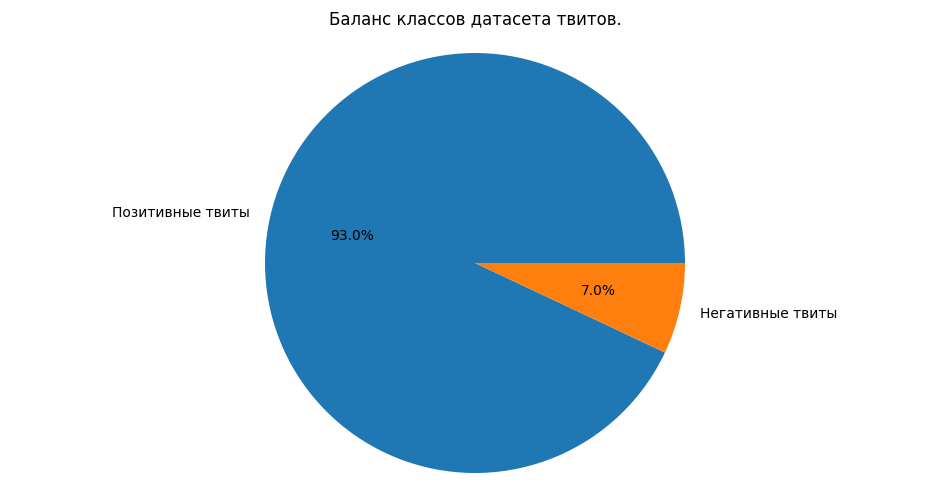

time: 94 ms (started: 2022-10-15 10:16:37 +03:00)


In [ ]:
# Проверка баланса классов
plt.figure(figsize=(12,6))

plt.pie(train_cleaned.label.value_counts(), 
        labels=['Позитивные твиты', 'Негативные твиты'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.title("Баланс классов датасета твитов.")

plt.show()

В нашем датасете дизбаланс классов. Позитивных твитов гораздо больше, чем негативных.

# Baseline (базовая модель)

Создадим базовую модель, чтобы иметь точку отсчёта качества для улучшений. В качестве базовой модели будем использовать алгроитм наивного Байеса без аугментации данных.

## Selecting data for modeling (Выбор данных для моделирования)

### Selecting a prediction target (Выбор цели прогноза)

In [ ]:
y = train_cleaned['label']

time: 0 ns (started: 2022-10-15 10:16:41 +03:00)


In [ ]:
y.head()

id
1    0
2    0
3    0
4    0
5    0
Name: label, dtype: int64

time: 16 ms (started: 2022-10-15 10:16:42 +03:00)


### Select model features (Выбор параметров модели)

In [ ]:
X = train_cleaned.drop('label', axis=1)

time: 0 ns (started: 2022-10-15 10:16:42 +03:00)


In [ ]:
X.head()

,tweet
id,
1,father dysfunctional selfish drag kid dysfunct...
2,thank lyft credit use cause offer wheelchair ...
3,bihday majesty
4,model love take time
5,factsguide society motivation


time: 15 ms (started: 2022-10-15 10:16:43 +03:00)


## Dividing the dataset into training and test samples (Разделение датасета на тренировочную и тестовую выборки)

Разделим тренировочную часть датасета на тренировочную и тестовую выборки без аугментации данных (аугментацию данных будем проводить в конвеере):

In [ ]:
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(
    X, y, test_size=0.3, random_state=1, shuffle=True, stratify=y)

X_train_base.head()

,tweet
id,
31934,judd homophobic freemilo milo freemilo milo fr...
3878,live right noww vocal voyage gmt ...
31012,first comic book dontask filmmake
15720,wedding impoant celebrate life possibility an...
22433,motivation tip choose motivationmonday blogg...


time: 16 ms (started: 2022-10-15 10:16:47 +03:00)


## Naive Bayes Classifier (Классификатор Наивного Байеса)

В качестве базовой модели используем классификатор Наивного Байеса для мультиномиальных моделей. В базовой модели не будем использовать аугментацию данных, чтобы иметь возможность сравнить различные подходы.

Создадим словарь и список для хранения результатов различных используемых подходов:

In [ ]:
row_index = []
scores = {"Model best param": [], "Balance algorithm type": [], "Resampler": [], "Macro avg precision": [], "Macro avg recall": [], "Macro avg f1-score": []}

time: 0 ns (started: 2022-10-14 17:58:47 +03:00)


> ВАЖНО!!!    
> В векторизатор текста можно подавать только одномерный массив (1-D array)!!! 
> Подробности написанны вот здесь:
> https://towardsdatascience.com/getting-the-most-out-of-scikit-learn-pipelines-c2afc4410f1a

> ЦИТИРУЮ:    
> Tip: Both TfidfVectorizer and CountVectorizer expect a ***1-D array, so the column name needs to be passed to ColumnTransformer as a string and not as a list, even if the list has only a single entry. If you give either of these transformers a list, you will get an error referring to incompatible row dimensions. Most other sklearn transformers expect a 2-D array (such as OneHotEncoder), so even if you’re only transforming a single column, you need to pass a list.***


In [ ]:
# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]


# Препроцессор для текстовых столбцов
text_preprocessor = Pipeline(steps=[("TF_IFD_Vectorizer", TfidfVectorizer())])

# Препроцессор преобразования датасета
dataset_preprocessor = ColumnTransformer(
    [("TF_IFD_Vectorizer", text_preprocessor, 'tweet')])

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации

print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("None")
scores["Resampler"].append("None")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8907
           1       0.81      0.52      0.63       671

    accuracy                           0.96      9578
   macro avg       0.89      0.76      0.81      9578
weighted avg       0.95      0.96      0.95      9578

-----------------------------------------------------
Precision : 0.89
Recall    : 0.76
F-score   : 0.81
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81


time: 22.9 s (started: 2022-10-14 17:58:53 +03:00)


Из полученных результатов видно, что результаты по классу `1` не очень хорошие. Причина этого кроется в дизбалансе классов в датасете.

# Feature Engineering (Инженерия параметров)

## Data augmentation (Аугментация данных)

Аугментация (augmentation) данных – это построение дополнительных данных из исходных при решении задач машинного обучения. Цель аугментации - искусственно выровнять баланс классов в наборе данных, при их нехватке. 

### Оверсемплинг данных (Data over-sampling)

С помощью оверсемплинга создаются копии экземпляров миноритарного (недостающего) класса. Это позволяет сбалансировать датасет и улучшить метрики модели.

#### Наивный случайный over-sampling (Random Over Sampler)

In [ ]:
from imblearn.over_sampling import RandomOverSampler 

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", RandomOverSampler(random_state=0, sampling_strategy='minority')), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем балланс классов

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Over-sampling")
scores["Resampler"].append("RandomOverSampler")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8907
           1       0.48      0.78      0.59       671

    accuracy                           0.92      9578
   macro avg       0.73      0.86      0.78      9578
weighted avg       0.95      0.92      0.93      9578

-----------------------------------------------------
Precision : 0.73
Recall    : 0.86
F-score   : 0.78
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78


time: 22.6 s (started: 2022-10-14 17:59:31 +03:00)


#### Алгоритм SMOTE (SMOTE)

In [ ]:
# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", SMOTE(random_state=42, sampling_strategy = 'minority', n_jobs = -1)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации

print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Over-sampling")
scores["Resampler"].append("SMOTE")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      8907
           1       0.48      0.78      0.59       671

    accuracy                           0.93      9578
   macro avg       0.73      0.86      0.78      9578
weighted avg       0.95      0.93      0.93      9578

-----------------------------------------------------
Precision : 0.73
Recall    : 0.86
F-score   : 0.78
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78


time: 27.1 s (started: 2022-10-14 18:00:21 +03:00)


#### Алгоритм ADASYN (ADASYN)

In [ ]:
from imblearn.over_sampling import ADASYN

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", ADASYN(random_state=42, sampling_strategy = 'minority', n_jobs = -1)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Over-sampling")
scores["Resampler"].append("ADASYN")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      8907
           1       0.45      0.80      0.58       671

    accuracy                           0.92      9578
   macro avg       0.72      0.86      0.77      9578
weighted avg       0.95      0.92      0.93      9578

-----------------------------------------------------
Precision : 0.72
Recall    : 0.86
F-score   : 0.77
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,ADASYN,0.72,0.86,0.77


time: 1min 21s (started: 2022-10-14 18:00:59 +03:00)


### Андерсемплинг данных (Data under-sampling)

С помощью андерсемплинга уменьшается число копии экземпляров мажоритарного  (самого большого) класса. Это позволяет сбалансировать датасет и улучшить метрики модели.

#### Наивный случайный under-sampling (Random Under Sampler)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", RandomUnderSampler(random_state=15)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("RandomUnderSampler")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.99      0.86      0.92      8907
           1       0.32      0.89      0.47       671

    accuracy                           0.86      9578
   macro avg       0.66      0.87      0.70      9578
weighted avg       0.94      0.86      0.89      9578

-----------------------------------------------------
Precision : 0.66
Recall    : 0.87
F-score   : 0.7
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,ADASYN,0.72,0.86,0.77
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.8000000001},Under-sampling,RandomUnderSampler,0.66,0.87,0.70


time: 22.2 s (started: 2022-10-14 18:02:21 +03:00)


#### Поиск связей Томека (Tomek Links)

In [ ]:
from imblearn.under_sampling import TomekLinks

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", TomekLinks(sampling_strategy='majority', n_jobs = -1)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("TomekLinks")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8907
           1       0.81      0.52      0.63       671

    accuracy                           0.96      9578
   macro avg       0.89      0.76      0.81      9578
weighted avg       0.95      0.96      0.95      9578

-----------------------------------------------------
Precision : 0.89
Recall    : 0.76
F-score   : 0.81
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,ADASYN,0.72,0.86,0.77
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.8000000001},Under-sampling,RandomUnderSampler,0.66,0.87,0.70
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81


time: 10min 59s (started: 2022-10-14 18:08:22 +03:00)


#### Односторонний сэмплинг (One-side sampling — OSS)

In [ ]:
from imblearn.under_sampling import OneSidedSelection

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", OneSidedSelection(random_state=42, sampling_strategy='majority', n_jobs = -1)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("OneSidedSelection")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8907
           1       0.81      0.52      0.63       671

    accuracy                           0.96      9578
   macro avg       0.89      0.76      0.81      9578
weighted avg       0.95      0.96      0.95      9578

-----------------------------------------------------
Precision : 0.89
Recall    : 0.76
F-score   : 0.81
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,ADASYN,0.72,0.86,0.77
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.8000000001},Under-sampling,RandomUnderSampler,0.66,0.87,0.70
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,OneSidedSelection,0.89,0.76,0.81


time: 9min 22s (started: 2022-10-14 18:19:21 +03:00)


#### Правило «очищающего» соседа (neighborhood cleaning rule — NCR)

In [ ]:
from imblearn.under_sampling import NeighbourhoodCleaningRule 

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline)"]

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", NeighbourhoodCleaningRule(sampling_strategy='majority', n_jobs = -1)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("NeighbourhoodCleaningRule")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

C:\Users\ArtyomBoyko\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  nnhood_label, _ = mode(nnhood_label, axis=1)
C:\Users\ArtyomBoyko\AppData\Local\Programs\Python\Python39\lib\site-packages\imblearn\under_sampling\_prototype_selection\_edited_nearest_neighbours.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims`

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8907
           1       0.81      0.52      0.63       671

    accuracy                           0.96      9578
   macro avg       0.89      0.76      0.81      9578
weighted avg       0.95      0.96      0.95      9578

-----------------------------------------------------
Precision : 0.89
Recall    : 0.76
F-score   : 0.81
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,ADASYN,0.72,0.86,0.77
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.8000000001},Under-sampling,RandomUnderSampler,0.66,0.87,0.70
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,OneSidedSelection,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,NeighbourhoodCleaningRule,0.89,0.76,0.81


time: 14min 14s (started: 2022-10-14 18:28:44 +03:00)


### Intermediate results (Промежуточные итоги)

Наиболее оптимальным методом аугментации данных для данного датасета является андер-семплинг. Так как он существенно увеличивает precession и f1-score для миноритарного класса `1`. В качестве используемого метода аугментации далее будем использовать поиск связей Томека (Tomek Links).

## Различные методы представления текста

### N-grams (N-граммы)

В данном разделе проверим зависимость качества модели от различных методов представления текста.

N-граммы - это комбинация нескольких слов, используемых вместе. N-граммы с N=1 называются униграммами. Аналогично, биграммы (N=2), триграммы (N=3) и так далее.

Униграммы обычно содержат не так много информации по сравнению с биграммами и триграммами. Основной принцип N-грамм заключается в том, что они отражают структуру языка, например, какая буква или слово может следовать за данным.

Чем длиннее N-грамма (чем выше n), тем с большим контекстом придется работать. Оптимальная длина зависит от конкретной задачи - если N-граммы слишком короткие, модель не уловить важные различия. С другой стороны, если они слишком длинные то, модель можете не уловить "общие знания" и придерживаться только конкретных случаев.

### Count vectorizer c N-граммами (1-3)



`CounterVectorization` - это библиотека SciKitLearn, которая преобразует любой текстовый документ и возвращает каждое уникальное слово в виде счётчика  количества раз, когда это слово встречается.

- Хотя это может привести к генерации большого количества параметров, есть несколько чрезвычайно полезных параметров, которые помогают избежать этого, включая `stop_words`, `n_grams` и `max_features`.

- `stop_words` указывает список слов, которые не будут включены в результат в качестве параметра. В первую очередь это относится к "английскому" словарю, где он избавляется от таких незначительных слов, как "is, the, a, it, as", которые могут встречаться довольно часто, но практически не оказывают позитивного влияния на качество модели (если не создают шум в данных).

- `ngrams_range` указывает, как группировать слова вместе. Вместо того чтобы NLP возвращало каждое слово отдельно, мы можем получить комбинации из нескольких слов, вроде "привет еще раз" или "увидимся позже".

- `max_features` - этот параметр функции указывает, сколько параметров необходимо создать. Если мы выберем значение `none`, это будет означать, что мы получим все имеющиеся слова в качестве параметров, но если мы установим значение `50`, мы получим только 50 наиболее часто встречающихся слов.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline) + CountVectorizer (1-3 bigrams)"]


# Препроцессор для текстовых столбцов
text_preprocessor = Pipeline(steps=[("CountVectorizer", CountVectorizer(ngram_range=(1,3)))])

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", TomekLinks(sampling_strategy='majority', n_jobs = -1)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("TomekLinks")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8907
           1       0.81      0.52      0.63       671

    accuracy                           0.96      9578
   macro avg       0.89      0.76      0.81      9578
weighted avg       0.95      0.96      0.95      9578

-----------------------------------------------------
Precision : 0.89
Recall    : 0.76
F-score   : 0.81
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,ADASYN,0.72,0.86,0.77
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.8000000001},Under-sampling,RandomUnderSampler,0.66,0.87,0.70
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,OneSidedSelection,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,NeighbourhoodCleaningRule,0.89,0.76,0.81
Multinomial Naive Bayes (baseline) + CountVectorizer (1-3 bigrams),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81


time: 10min 24s (started: 2022-10-14 18:42:59 +03:00)


### Tf-idf c N-граммами (1-3)

TF-IDF (от англ. TF — term frequency, IDF — inverse document frequency) — статистическая мера, используемая для оценки важности слова в контексте документа, являющегося частью коллекции документов или корпуса. Вес некоторого слова пропорционален частоте употребления этого слова в документе и обратно пропорционален частоте употребления слова во всех документах коллекции.

Аналогично `CounterVectorization`, `TfidfVectorizer` имеет следующие значимые параметры:

- `stop_words` - задает список стоп-слов, которые не будут учитываться в процессе векторизации теста.

- `ngram_range` - указывает, как сгрупировать слова вместе для получения N-грамм.

- `max_features` - ограничивает максимальное количество параметров генерируемых в процессе векторизации.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Добавим соответствующий индекс 
row_index += ["Multinomial Naive Bayes (baseline) + TfidfVectorizer (1-3 bigrams)"]


# Препроцессор для текстовых столбцов
text_preprocessor = Pipeline(steps=[("TF_IFD_Vectorizer", TfidfVectorizer(ngram_range=(1,3)))])

# Конвейер обьединяющий препроцессор данных, аугментацию и модель
pipe = Pipeline_with_sampler(
    steps=[("dataset_preprocessor", dataset_preprocessor),
           ("sampler", TomekLinks(sampling_strategy='majority', n_jobs = -1)), 
           ("naive_bayes", MultinomialNB())
           ])

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'naive_bayes__alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(pipe, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_base, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_base)

precision, recall, fscore, support = precision_recall_fscore_support(y_test_base, prediction, average='macro')

# Выведем результаты классификации
print(classification_report(y_test_base, prediction))
print("-----------------------------------------------------")
print("Precision : {}".format(round(precision, 2)))
print("Recall    : {}".format(round(recall, 2)))
print("F-score   : {}".format(round(fscore, 2)))
print("Support   : {}".format(support))

# Заносим результаты в таблицу
scores["Model best param"].append(str(gs.best_params_))
scores["Balance algorithm type"].append("Under-sampling")
scores["Resampler"].append("TomekLinks")

scores["Macro avg precision"].append(round(precision, 2))
scores["Macro avg recall"].append(round(recall, 2))
scores["Macro avg f1-score"].append(round(fscore, 2))

# Создаём датафрейм
df_scores = pd.DataFrame(scores, index=row_index)
df_scores

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8907
           1       0.81      0.52      0.63       671

    accuracy                           0.96      9578
   macro avg       0.89      0.76      0.81      9578
weighted avg       0.95      0.96      0.95      9578

-----------------------------------------------------
Precision : 0.89
Recall    : 0.76
F-score   : 0.81
Support   : None


,Model best param,Balance algorithm type,Resampler,Macro avg precision,Macro avg recall,Macro avg f1-score
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},None,None,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,RandomOverSampler,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,SMOTE,0.73,0.86,0.78
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.20000000010000002},Over-sampling,ADASYN,0.72,0.86,0.77
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 0.8000000001},Under-sampling,RandomUnderSampler,0.66,0.87,0.70
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,OneSidedSelection,0.89,0.76,0.81
Multinomial Naive Bayes (baseline),{'naive_bayes__alpha': 1e-10},Under-sampling,NeighbourhoodCleaningRule,0.89,0.76,0.81
Multinomial Naive Bayes (baseline) + CountVectorizer (1-3 bigrams),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81
Multinomial Naive Bayes (baseline) + TfidfVectorizer (1-3 bigrams),{'naive_bayes__alpha': 1e-10},Under-sampling,TomekLinks,0.89,0.76,0.81


time: 10min 46s (started: 2022-10-14 18:53:24 +03:00)


###  Эмбеддинги взвешенные по attention

In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

#Mean Pooling - Take attention mask into account for correct averaging
def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] #First element of model_output contains all token embeddings
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    return sum_embeddings / sum_mask

tokenizer = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_nlu_ru")
model = AutoModel.from_pretrained("sberbank-ai/sbert_large_nlu_ru")

# tokenizer = AutoTokenizer.from_pretrained("amberoad/bert-multilingual-passage-reranking-msmarco")
# model = AutoModelForSequenceClassification.from_pretrained("amberoad/bert-multilingual-passage-reranking-msmarco")

X_train_base_sentences = X_train_base.tweet.to_list()
X_test_base_sentences = X_test_base.tweet.to_list()

#Tokenize sentences
X_train_base_encoded_input = tokenizer(X_train_base_sentences, padding=True, truncation=True, max_length=24, return_tensors='pt')
X_test_base_encoded_input = tokenizer(X_test_base_sentences, padding=True, truncation=True, max_length=24, return_tensors='pt')

#Compute token embeddings
with torch.no_grad():
    model_output_train = model(**X_train_base_encoded_input)
    model_output_test = model(**X_test_base_encoded_input)

#Perform pooling. In this case, mean pooling
sentence_embeddings_train = mean_pooling(model_output_train, X_train_base_encoded_input['attention_mask'])
sentence_embeddings_test = mean_pooling(model_output_test, X_test_base_encoded_input['attention_mask'])

X_train_embedding_att = sentence_embeddings_train.detach().numpy()
X_test_embedding_att = sentence_embeddings_test.detach().numpy()

print("Complete!!!")

Downloading:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

C:\Users\ArtyomBoyko\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:123: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ArtyomBoyko\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Downloading:   0%|          | 0.00/696 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

NameError: name 'AutoModelForSequenceClassification' is not defined

time: 10.4 s (started: 2022-10-15 13:33:56 +03:00)


Массивы на выходе содержат отрицательные значения, классификатор Байесса работате только с положительными значениями. Необходимо скорректировать оба массива:

In [ ]:
def calculate_correction_factor(array_1, array_2):
    minimal_values = [array_1.min(), array_2.min()]
    minimal_values = np.floor(minimal_values)
    return (-1 * min(minimal_values))

corr_factor = calculate_correction_factor(X_train_embedding_att, X_test_embedding_att)

X_train_embedding_att_corr = X_train_embedding_att + corr_factor
X_test_embedding_att_corr = X_test_embedding_att + corr_factor 


time: 15 ms (started: 2022-10-15 13:26:22 +03:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Необходимо преобразовать массивы, чтобы они не содержали отрицательных чисел.
# Модель Байеса не работает с отрицательными
embedding_att_train_no_neg = embedding_att_train + (-1 * np.round((embedding_att_train.min()), decimals=0))
embedding_att_test_no_neg = embedding_att_test + (-1 * np.round((embedding_att_test.min()), decimals=0))

nb = MultinomialNB()

# Диапазоны гиперпараметров модели для перебора
nb_grid = {'alpha': np.arange(0.0000000001, 6, 0.2)}

# Оптимизатор гиперпараметров
gs = GridSearchCV(nb, param_grid=nb_grid, scoring='f1_macro', cv=5)

# Подбираем гиперпараметры 
gs.fit(X_train_embedding_att_corr, y_train_base)

# Делаем предсказание на тестовой выборке
prediction = gs.predict(X_test_embedding_att_corr)

print(classification_report(y_test_base, prediction))

print("Complete!!!")

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      8907
           1       0.55      0.15      0.23       671

    accuracy                           0.93      9578
   macro avg       0.74      0.57      0.60      9578
weighted avg       0.91      0.93      0.91      9578

Complete!!!
time: 13 s (started: 2022-10-15 13:26:47 +03:00)


#  ИТОГОВЫЕ ВЫВОДЫ

1. Изначально некачественный датасет приводит к большим трудозатратам в процессе его очистки и не очень хорошему результату. Даже не смотря на применение аугментации.
2. Последний пункт понял 50/50, по причине отсутсвия опыта работы с трансформерами. Делал по большей части интуитивно.

# Дополнительные материалы

https://regex101.com/

https://www.kaggle.com/code/anubhavgoyal10/basic-text-preprocessing-template-nlp

https://www.englishclub.com/esl-chat/abbreviations.htm

https://kb.iu.edu/d/adkc

Удаление чисел из текста:    
https://www.kaggle.com/code/eisgandar/twitter-sentiment-analysis-hatred-speech

Рсшифровка эмоджи:    
https://www.kaggle.com/code/anubhavgoyal10/basic-text-preprocessing-template-nlp

Извлечение эмоджи из текста:    
https://stackoverflow.com/questions/43146528/how-to-extract-all-the-emojis-from-text    
https://carpedm20.github.io/emoji/docs/    
https://gist.github.com/jezdez/0185e35704dbdf3c880f

Удаление частых и не частых слов, еще один способ:    
https://www.kaggle.com/code/prashant111/a-beginners-guide-to-dealing-with-text-data

О метриках классификации:
https://www.kaggle.com/code/balamurugan1603/twitter-sentiment-analysis

Эмотиконы (Смайлики):    
https://en.wikipedia.org/wiki/List_of_emoticons#Eastern

Словарь интернет сленга с рейтингом популярных сокращений:    
https://internetslang.com/

NLTK:    
https://www.nltk.org/howto/stem.html

Хорошая работа проверяющая эфффективность инженерии параметров прежде, чем ее делать:    
https://www.kaggle.com/code/pradneshlachake/twitter-sentiment-analysis-nlp-smote

Использование `precision_recall_fscore_support` вместо `classification_report`:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
https://stackoverflow.com/questions/48417867/access-to-numbers-in-classification-report-sklearn

Заметки для себя (как будет больше времени, нужно сделать):

1. После лемматизации остается не тронутым `i'm`, понять почему? Ведь в небольшом датасете оно успешно заменяется на `be`
2. Сделать функции для удобной обработки и применеия Pandas dataframe pipeline/